In [ ]:
## 1. Titanic
##### 1. Определите количество мужчин и женщин, которые ехали на корабле.
##### 2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 
##### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
##### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 
##### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
##### 6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.
##### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
##### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках
##### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 
##### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.


In [73]:
import pandas as pd
import numpy as np
%matplotlib inline
a0 = pd.read_csv('train.csv')

In [13]:
pass_data = pd.read_csv('train.csv')
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 1. Определите количество мужчин и женщин, которые ехали на корабле.

In [14]:
df = pd.read_csv('train.csv', index_col=0)

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### 2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров

In [52]:
a1=len(a0)
a2=a0[(a0.Survived == 1)].shape
print("Кол-во выживших = ", a2[0])
print("Доля выживших = ", a2[0]/a1)

Кол-во выживших =  342
Доля выживших =  0.3838383838383838


#### 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [53]:
a3=a0[(a0.Pclass == 1)].shape
print("Доля пассажиров 1 класса = ",a3[0]/a1)

Доля пассажиров 1 класса =  0.24242424242424243


#### 4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [57]:
print("Средний возраст:")
df['Age'].mean()

Средний возраст:


29.69911764705882

In [58]:
print("Медиана возраста:")
df['Age'].median()

Медиана возраста:


28.0

#### 5. Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch

In [3]:
from scipy import stats
corr_p, pvalue_p = stats.pearsonr(a0['SibSp'], a0['Parch'])
print ("Коэффициент корреляции = ", corr_p)
print ("P-value = ", pvalue_p)

Коэффициент корреляции =  0.4148376986201561
P-value =  2.2418236681384912e-38


<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

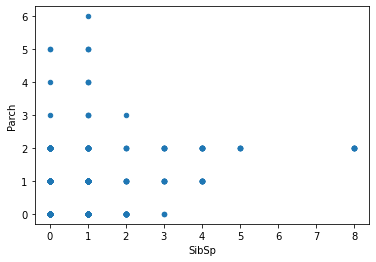

In [13]:
df.plot.scatter(x='SibSp', y='Parch')

#### 6. Какое самое популярное женское имя на корабле?

In [69]:
def first_name_female(name):
    first = name.str.extract(r"Mrs\.\s+[^(]*\((\w+)", expand=False)
    first.loc[first.isna()] = name.str.extract(r"\.\s+(\w+)", expand=False)
    return first

In [70]:
female_names = first_name_female(a0.loc[a0['Sex'] == 'female', 'Name'])
female_names

1       Florence
2          Laina
3           Lily
8      Elisabeth
11     Elizabeth
         ...    
880      Imanita
882        Gerda
885     Margaret
887     Margaret
888    Catherine
Name: Name, Length: 246, dtype: object

In [72]:
print("Cамое популярное женское имя на корабле:")
female_names.value_counts().index.values[0]

Cамое популярное женское имя на корабле:


'Mary'

##### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [9]:
corr_p, pvalue_p = stats.pearsonr(a0['Pclass'], a0['Survived'])
print ("Коэффициент корреляции Пирсона = ", corr_p)
print ("P-value = ", pvalue_p)

Коэффициент корреляции Пирсона =  -0.3384810359610153
P-value =  2.537047387978631e-25


In [8]:
corr_s, pvalue_s = stats.spearmanr(a0['Pclass'], a0['Survived'])
print ("Коэффициент корреляции Спирмена = ", corr_s)
print ("P-value = ", pvalue_s)

Коэффициент корреляции Спирмена =  -0.33966793665005257
P-value =  1.6876081409966053e-25


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

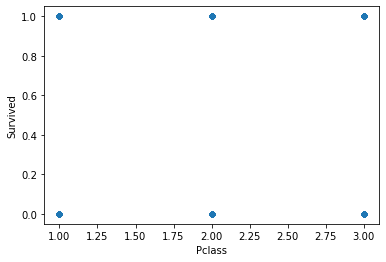

In [43]:
df.plot.scatter(x='Pclass', y='Survived')

#### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. 
#### Сделайте выводы. Отобразите данные на одном и нескольких графиках

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

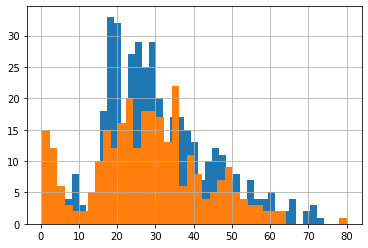

In [90]:
pp=a0.groupby('Survived')
pp.Age.hist(bins = 40)

<AxesSubplot:>

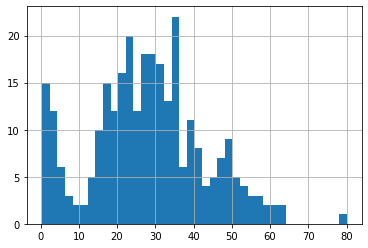

In [78]:
p1=a0[(a0.Survived == 1)]
p1.Age.hist(bins = 40) #выжившие пассажиры

<AxesSubplot:>

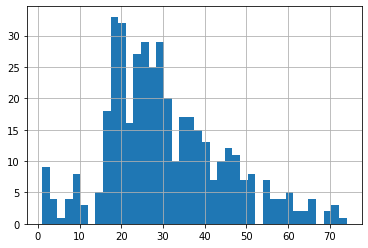

In [80]:
p0=a0[(a0.Survived == 0)]
p0.Age.hist(bins = 40) #погибшие пассажиры

##### Вывод: До 12 лет выживших больше погибших, в возрасте от 12 до 76 лет погибших больше выживших.Самый старый человек (80 лет) выжил.
##### В возрасте от 18 до 22 лет наибольшее отношении между выжившими и погибшими (15:32). 

#### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.

Survived  Pclass
0         1         AxesSubplot(0.125,0.125;0.775x0.755)
          2         AxesSubplot(0.125,0.125;0.775x0.755)
          3         AxesSubplot(0.125,0.125;0.775x0.755)
1         1         AxesSubplot(0.125,0.125;0.775x0.755)
          2         AxesSubplot(0.125,0.125;0.775x0.755)
          3         AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

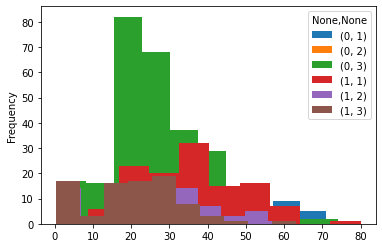

In [91]:
ppp=a0.groupby(['Survived','Pclass'])
ppp.Age.plot.hist(legend = bool)

##### Вывод: 3 класс спасали в последнюю очередь, поэтому большинсво погибших среди этого класса.
##### Самый выживаемый класс - 1 класс, т.к. его спасали в первую очередь.

#### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<AxesSubplot:xlabel='Sex'>

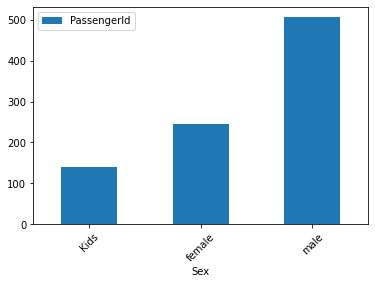

In [19]:
a0['Sex']=np.where((a0.Age<=18), 'Kids', a0.Sex)
a0.groupby(['Sex']).count().plot(y='PassengerId',kind='bar', rot=45)

<AxesSubplot:ylabel='PassengerId'>

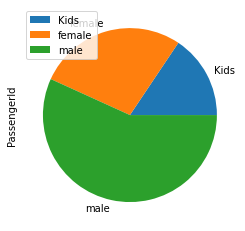

In [104]:
a0['Sex']=np.where((a0.Age<=18), 'Kids', a0.Sex)
a0.groupby(['Sex']).count().plot(y='PassengerId',kind='pie', rot=45)